Importing the Numpy library for manipulation of array-based data. This library is used for numerical computing. Importing the Pandas library for manipulation of heterogenous and labeled data. This library is is used for organizing big data. Importing matplot.lib and seaborn for visualizaions. Importing libraries from sklearn to assist with model creation, production, and the use of metrics to evaluate those models.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.autolayout'] = True

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc,
                             RocCurveDisplay, ConfusionMatrixDisplay, classification_report, confusion_matrix)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
!pip install tensorflow
!pip install intel-tensorflow



RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [2]:
#Acquire

Loading the Behavioral Risk Factor Surveillance System (BRFSS) dataset for 2024.This file is in XPT (SAS transport) format, so we use read_sas() to import it.The dataset contains survey responses from adults about their health behaviors.Each row represents one participant, and each column is a survey variable.

In [2]:
diabetes_df = pd.read_sas('LLCP2024.XPT ', format='xport')

Checking the contents of the first 5 rows and accompanying columns to make sure the transfer was done successfully. The data in Python starts with 0 as their first row. This step also gives a little bit of insight into the data you are working with.

In [3]:
diabetes_df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_LCSCTSN,_LCSPSTF,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK3,_RFDRHV9,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.0,2.0,b'02282024',b'02',b'28',b'2024',1100.0,b'2024000001',2.024000e+09,1.0,...,NaN,9.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,2.0,2.0
1,1.0,2.0,b'02212024',b'02',b'21',b'2024',1100.0,b'2024000002',2.024000e+09,1.0,...,4.0,9.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0
2,1.0,2.0,b'02212024',b'02',b'21',b'2024',1100.0,b'2024000003',2.024000e+09,1.0,...,4.0,2.0,1.0,1.000000e+02,2.0,1.400000e+03,1.0,NaN,NaN,2.0
3,1.0,2.0,b'02282024',b'02',b'28',b'2024',1100.0,b'2024000004',2.024000e+09,1.0,...,NaN,9.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0
4,1.0,2.0,b'02212024',b'02',b'21',b'2024',1100.0,b'2024000005',2.024000e+09,1.0,...,3.0,9.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,2.0


Querying the original dataset. For this analysis, only certain variables are needed, so I am subsetting this dataset to only include necessary variables. The necessary variables include: DIABETE4, _RACE, _AGEG5YR, EXERANY2, SMOKE100, GENHLTH, _BMI5CAT, _SEX, and _RFDRHV9. Querying the data helps to block unnecesary noise from the models that will be conducted later on in the analysis, it also helps to summzarize data and find patterns between variables. I am going to first make a list of those necessary videos and then subset them by putting them into a dataframe of their own.

In [3]:
necessary_columns = ['DIABETE4','_RACE','_AGEG5YR','EXERANY2','SMOKE100','GENHLTH','_BMI5CAT','_SEX','_RFDRHV9']
quiered_data = diabetes_df[necessary_columns].copy()

Checking the contents of the subsetted dataframe to make sure the transfer was successful.

In [5]:
quiered_data.head()

,DIABETE4,_RACE,_AGEG5YR,EXERANY2,SMOKE100,GENHLTH,_BMI5CAT,_SEX,_RFDRHV9
0,3.0,1.0,12.0,1.0,2.0,3.0,2.0,2.0,1.0
1,3.0,1.0,13.0,1.0,1.0,1.0,3.0,1.0,1.0
2,3.0,1.0,8.0,1.0,1.0,2.0,2.0,1.0,1.0
3,3.0,1.0,13.0,1.0,2.0,1.0,3.0,1.0,1.0
4,3.0,1.0,6.0,2.0,2.0,3.0,2.0,1.0,1.0


In [66]:
#Prepare

In [67]:
##Explore

This step informs us on how many rows and columns are within the data frame that we subsetted. This says that we have 475,670 rows and 9 columns or attributes.

In [6]:
quiered_data.shape

(457670, 9)

This step informs us of the data types we have from our attributes in our dataframe. All of the attributes in our dataframe are 'float64' which means default integers.

In [7]:
quiered_data.dtypes

DIABETE4    float64
_RACE       float64
_AGEG5YR    float64
EXERANY2    float64
SMOKE100    float64
GENHLTH     float64
_BMI5CAT    float64
_SEX        float64
_RFDRHV9    float64
dtype: object

This step summarizes the numerical attributes in our dataframe. Even though they are integers, they represent answers of a categories. Informing us of the most chosen (avaerage) category for most of them. The count for each attribute tells inexplicitly the amount of missing values we have, however, we will get an accurate number shortly.

In [8]:
quiered_data.describe()

,DIABETE4,_RACE,_AGEG5YR,EXERANY2,SMOKE100,GENHLTH,_BMI5CAT,_SEX,_RFDRHV9
count,457666.000000,457670.000000,457670.000000,457667.000000,428810.000000,457665.000000,414633.000000,457670.000000,457670.000000
mean,2.739718,2.287550,7.781845,1.251427,1.643007,2.659362,3.009244,1.524751,1.869063
std,0.765308,2.511348,3.738928,0.547624,0.667560,1.081163,0.836549,0.499388,2.414067
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,1.000000,5.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,3.000000,1.000000,8.000000,1.000000,2.000000,3.000000,3.000000,2.000000,1.000000
75%,3.000000,2.000000,11.000000,1.000000,2.000000,3.000000,4.000000,2.000000,1.000000
max,9.000000,9.000000,14.000000,9.000000,9.000000,9.000000,4.000000,2.000000,9.000000


This step takes the count of the missing values in each attribute. Each of these values are less than 10% of the whole dataset that we have, so decisions later would need to be made on how to handle them.

In [9]:
quiered_data.isna().sum()

DIABETE4        4
_RACE           0
_AGEG5YR        0
EXERANY2        3
SMOKE100    28860
GENHLTH         5
_BMI5CAT    43037
_SEX            0
_RFDRHV9        0
dtype: int64

This step is to get counts of each category within each attribute in our susbet dataframe. This lets the researcher know the distribution of the categories and gives them insight into uneven categories.

In [51]:
quiered_data['DIABETE4'].value_counts(dropna=False)

DIABETE4
3.0    376125
1.0     65809
4.0     11307
2.0      3395
7.0       798
9.0       232
NaN         4
Name: count, dtype: int64

In [52]:
quiered_data['_RACE'].value_counts(dropna=False)

_RACE
1.0    329346
8.0     48646
2.0     35172
4.0     12646
7.0     10486
9.0      9103
3.0      6460
6.0      3737
5.0      2074
Name: count, dtype: int64

In [53]:
quiered_data['_AGEG5YR'].value_counts(dropna=False)

_AGEG5YR
10.0    47701
11.0    44774
9.0     43387
13.0    41756
12.0    36803
8.0     34936
7.0     31698
5.0     30899
1.0     29692
6.0     28968
4.0     28804
3.0     26237
2.0     23705
14.0     8310
Name: count, dtype: int64

In [54]:
quiered_data['EXERANY2'].value_counts(dropna=False)

EXERANY2
1.0    350061
2.0    106294
7.0       860
9.0       452
NaN         3
Name: count, dtype: int64

In [55]:
quiered_data['SMOKE100'].value_counts(dropna=False)

SMOKE100
2.0    258956
1.0    167242
NaN     28860
7.0      2062
9.0       550
Name: count, dtype: int64

In [56]:
quiered_data['GENHLTH'].value_counts(dropna=False)

GENHLTH
3.0    156229
2.0    145791
4.0     67919
1.0     64217
5.0     22204
7.0       915
9.0       390
NaN         5
Name: count, dtype: int64

In [57]:
quiered_data['_BMI5CAT'].value_counts(dropna=False)

_BMI5CAT
3.0    146563
4.0    139640
2.0    121053
NaN     43037
1.0      7377
Name: count, dtype: int64

In [58]:
quiered_data['_SEX'].value_counts(dropna=False)

_SEX
2.0    240163
1.0    217507
Name: count, dtype: int64

In [59]:
quiered_data['_RFDRHV9'].value_counts(dropna=False)

_RFDRHV9
1.0    386812
9.0     46698
2.0     24160
Name: count, dtype: int64

In [ ]:
##Preprocessing

This step imputes the missing values using mode imputation

In [4]:
for col in ['DIABETE4', 'EXERANY2', 'GENHLTH']:
    mode_attr = quiered_data[col].mode()[0]
    quiered_data[col] = quiered_data[col].fillna(mode_attr)


This steps checks to make sure what we did was successful imputation

In [11]:
quiered_data.isna().sum()

DIABETE4        0
_RACE           0
_AGEG5YR        0
EXERANY2        0
SMOKE100    28860
GENHLTH         0
_BMI5CAT    43037
_SEX            0
_RFDRHV9        0
dtype: int64

This step converts specific attributes that have categories labeled a '7' or '9' or '14' into missing values so they can be handled properly.

In [5]:
attr = ['SMOKE100', 'DIABETE4', 'EXERANY2','GENHLTH']
quiered_data[attr] = quiered_data[attr].replace({7: np.nan, 9: np.nan})

cols = ['_RACE', '_RFDRHV9']
quiered_data[cols] = quiered_data[cols].replace({9: np.nan})

colss = ['_AGEG5YR']
quiered_data[colss] = quiered_data[colss].replace({14: np.nan})

This step checks to make sure we were successful in creating NaNs in these attributes.

In [13]:
quiered_data.isna().sum()

DIABETE4     1030
_RACE        9103
_AGEG5YR     8310
EXERANY2     1312
SMOKE100    31472
GENHLTH      1305
_BMI5CAT    43037
_SEX            0
_RFDRHV9    46698
dtype: int64

This step defines the function we are going to employ for the sochastic categorical imputation.

In [6]:
def impute_by_distribution(df, columns):
    for column in columns:
        dist = df[column].value_counts(normalize=True)
        missing_idx = df[df[column].isna()].index
        if not missing_idx.empty and not dist.empty:
            df.loc[missing_idx, column] = np.random.choice(
                dist.index,
                size=len(missing_idx),
                p=dist.values
            )
    return df

This step imputes majority of the attributes with missing values using sochastic categorical imputation.

In [7]:
attr_to_impute = ['DIABETE4', '_RACE', 'EXERANY2', 'SMOKE100', 'GENHLTH', '_BMI5CAT', '_RFDRHV9']
quiered_data = impute_by_distribution(quiered_data, attr_to_impute)

This step checks to make sure we have successfully imputated of most of the attributes...

In [16]:
quiered_data.isna().sum()

DIABETE4       0
_RACE          0
_AGEG5YR    8310
EXERANY2       0
SMOKE100       0
GENHLTH        0
_BMI5CAT       0
_SEX           0
_RFDRHV9       0
dtype: int64

This step imputes the _AGE5GYR attribute with sochastic categorical imputation using only allowed categories per the data dictionary.

In [8]:
allowed = [7, 8, 9]
dist = quiered_data.loc[quiered_data['_AGEG5YR'].isin(allowed), '_AGEG5YR'].value_counts(normalize=True)
missing_idx = quiered_data[quiered_data['_AGEG5YR'].isna()].index
quiered_data.loc[missing_idx, '_AGEG5YR'] = np.random.choice(dist.index, size=len(missing_idx), p=dist.values)

This step makes a final check to ensure we have handled all missing values.

In [18]:
quiered_data.isna().sum()

DIABETE4    0
_RACE       0
_AGEG5YR    0
EXERANY2    0
SMOKE100    0
GENHLTH     0
_BMI5CAT    0
_SEX        0
_RFDRHV9    0
dtype: int64

This step rechecks the rows

In [15]:
quiered_data.shape

(457670, 9)

This step recodes categories for better perception.

In [9]:
quiered_data['DIABETE4'] = quiered_data['DIABETE4'].replace({
    1:0,
    2:1,
    3:1,
    4:1
})
quiered_data['_AGEG5YR'] = quiered_data['_AGEG5YR'].replace({
    1:1,
    2:1,
    3:1,
    4:2,
    5:2,
    6:2,
    7:2,
    8:3,
    9:3,
    10:3,
    11:3,
    12:3,
    13:3
})
quiered_data['_SEX'] = quiered_data['_SEX'].replace({
    1:0,
    2:1
})
quiered_data['EXERANY2'] = quiered_data['EXERANY2'].replace({
    1:0,
    2:1
})
quiered_data['GENHLTH'] = quiered_data['GENHLTH'].replace({
    1:0,
    2:0,
    3:1,
    4:1,
    5:2
})
quiered_data['SMOKE100'] = quiered_data['SMOKE100'].replace({
    1:1,
    2:0
})
quiered_data['_RFDRHV9'] = quiered_data['_RFDRHV9'].replace({
    1:0,
    2:1
})
#This specifically reclassifies minoirty counts into another category called 'Other' 
quiered_data['_RACE'] = quiered_data['_RACE'].replace({
    3:5,
    5:5,
    6:5,
    7:5,
    8:3
})

In [ ]:
This step rechecks the dataframe to make sure the recoding was successful.

In [17]:
quiered_data.head()

,DIABETE4,_RACE,_AGEG5YR,EXERANY2,SMOKE100,GENHLTH,_BMI5CAT,_SEX,_RFDRHV9
0,1.0,1.0,3.0,0.0,0.0,1.0,2.0,1.0,0.0
1,1.0,1.0,3.0,0.0,1.0,0.0,3.0,0.0,0.0
2,1.0,1.0,3.0,0.0,1.0,0.0,2.0,0.0,0.0
3,1.0,1.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0
4,1.0,1.0,2.0,1.0,0.0,1.0,2.0,0.0,0.0


In [ ]:
This step renames the attributes.

In [10]:
quiered_data = quiered_data.rename(columns={
    'DIABETE4': 'Diabetes',
    '_SEX': 'Sex',
    '_AGEG5YR': 'Age',
    'EXERANY2': 'Exercise',
    '_BMI5CAT': 'BMI',
    'GENHLTH': 'GeneralHealth',
    '_RACE': 'Race',
    'SMOKE100': 'HeavySmoker',
    '_RFDRHV9': 'HeavyAlcohol'
})

In [ ]:
This step checks to ensure the attributes have been renamed

In [19]:
quiered_data.head()

,Diabetes,Race,Age,Exercise,HeavySmoker,GeneralHealth,BMI,Sex,HeavyAlcohol
0,1.0,1.0,3.0,0.0,0.0,1.0,2.0,1.0,0.0
1,1.0,1.0,3.0,0.0,1.0,0.0,3.0,0.0,0.0
2,1.0,1.0,3.0,0.0,1.0,0.0,2.0,0.0,0.0
3,1.0,1.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0
4,1.0,1.0,2.0,1.0,0.0,1.0,2.0,0.0,0.0


In [ ]:
##Analyzing

This graph analyzes multiple variables at one time to capture patterns with in the data and strong relationships between them.

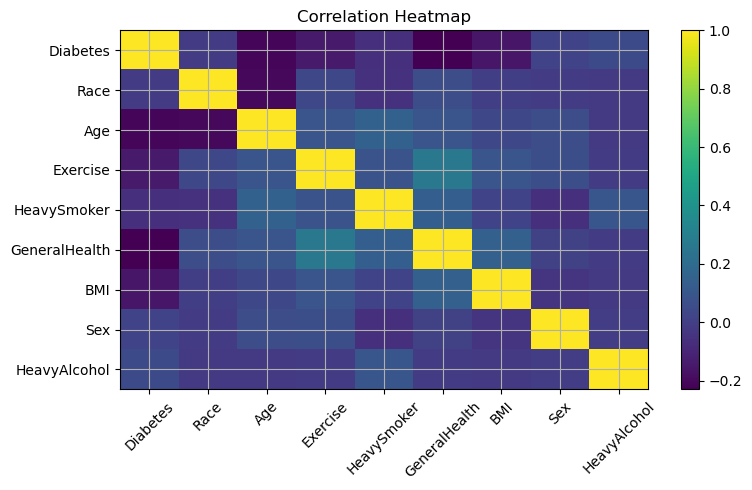

In [24]:
cols = ['Diabetes','Race','Age','Exercise','HeavySmoker','GeneralHealth','BMI','Sex','HeavyAlcohol']
corr = quiered_data[cols].corr()

fig = plt.figure()
plt.imshow(corr, aspect='auto')
plt.xticks(range(len(cols)), cols, rotation=45)
plt.yticks(range(len(cols)), cols)
plt.title('Correlation Heatmap')
plt.colorbar()
plt.show()

This graph exhibits the diatribution of Race.

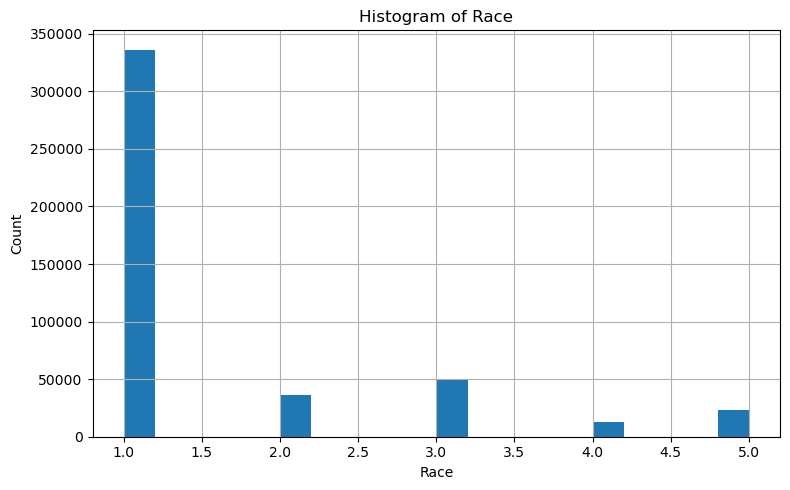

In [25]:
fig = plt.figure()
plt.hist(quiered_data['Race'], bins=20) 
plt.title('Histogram of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [ ]:
This graph shows the distribution of BMI.

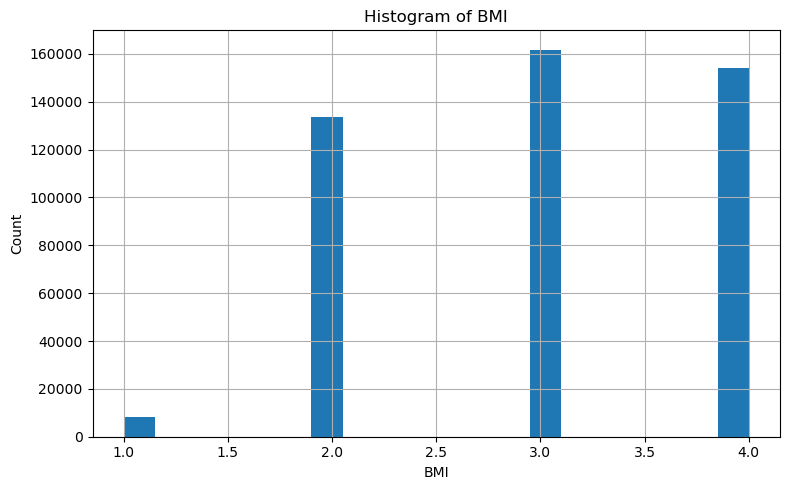

In [26]:
fig = plt.figure()
plt.hist(quiered_data['BMI'], bins=20)  
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

This graph shows the comparsion between Age vs Diabetes.

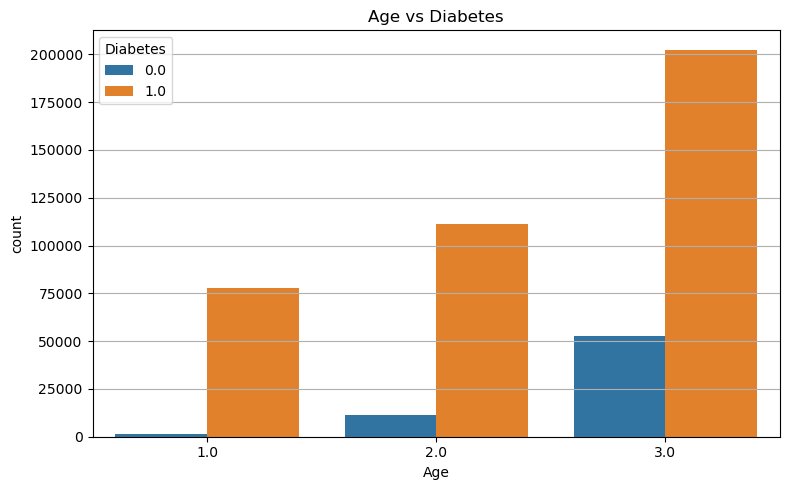

In [27]:
sns.countplot(x='Age', hue='Diabetes', data=quiered_data)
plt.title('Age vs Diabetes')
plt.show()

This graph shows the comparison between HeavySmoker vs HeavyAlcohol.

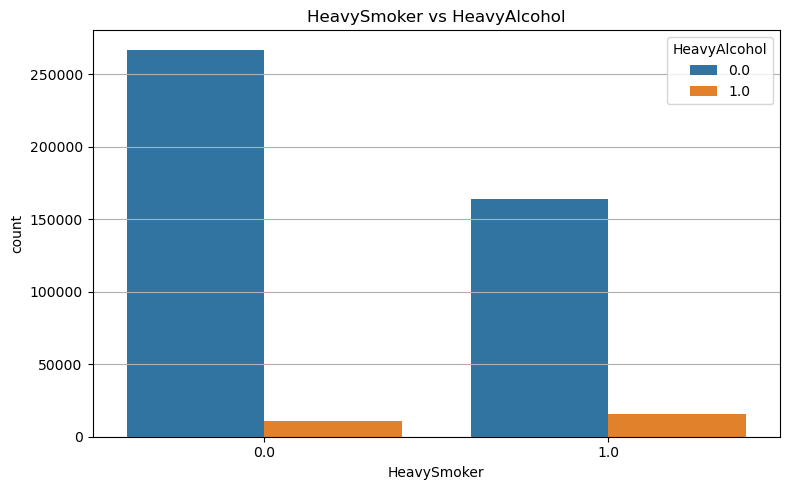

In [28]:
sns.countplot(x='HeavySmoker', hue='HeavyAlcohol', data=quiered_data)
plt.title('HeavySmoker vs HeavyAlcohol')
plt.show()

This graph exhibits the comparison between GeneralHealth vs BMI.

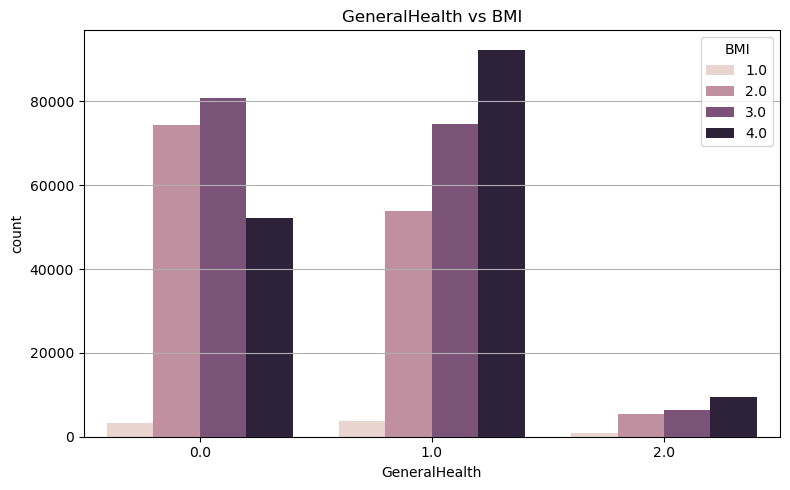

In [29]:
sns.countplot(x='GeneralHealth', hue='BMI', data=quiered_data)
plt.title('GeneralHealth vs BMI')
plt.show()

This step splits our data into two sets: a training and testing set. The trainng set is used to train the models on this data and the testing set is employed to see how well the models classify to unseen data.

In [11]:
X = quiered_data[['Race', 'GeneralHealth','Sex', 'Exercise', 'HeavySmoker', 'Age',
                       'BMI', 'HeavyAlcohol']]
y = quiered_data['Diabetes']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y
)
X_train.shape, X_test.shape

((343252, 8), (114418, 8))

This step creates and runs a logistic regression model on our train data and predicts on our testing data to see how well it performs on unseen data. We can see how this model performs on unseen data by using metrics like accuracy, precision, recall, and F-1 score. 

In [12]:
logreg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(max_iter=500, random_state=RANDOM_STATE))
])

logreg_pipe.fit(X_train, y_train)

y_pred = logreg_pipe.predict(X_test)
y_prob = logreg_pipe.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.49      0.06      0.11     16490
         1.0       0.86      0.99      0.92     97928

    accuracy                           0.86    114418
   macro avg       0.68      0.53      0.51    114418
weighted avg       0.81      0.86      0.80    114418

ROC-AUC: 0.7737650058267336


In [ ]:
This step produces the confusion matrix and ROC curve for the logistic regression model

<Figure size 800x500 with 0 Axes>

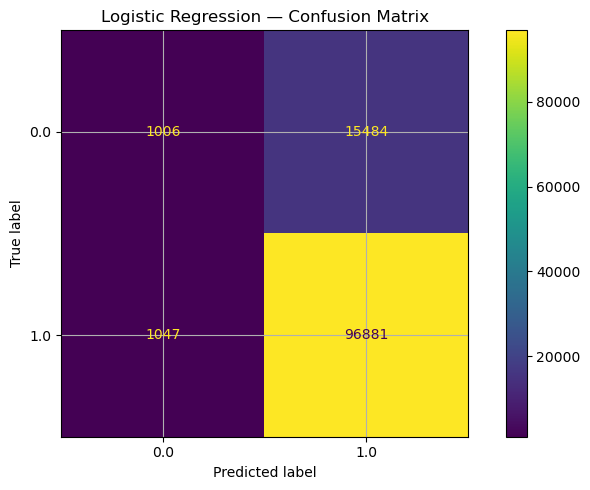

<Figure size 800x500 with 0 Axes>

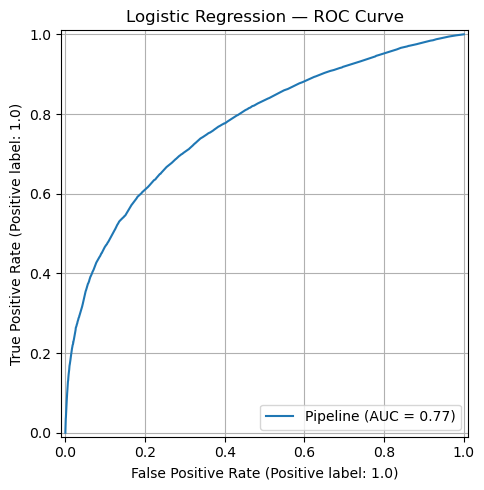

In [13]:
# Confusion matrix & ROC curve
fig = plt.figure()
ConfusionMatrixDisplay.from_estimator(logreg_pipe, X_test, y_test)
plt.title('Logistic Regression — Confusion Matrix')
plt.show()

fig = plt.figure()
RocCurveDisplay.from_estimator(logreg_pipe, X_test, y_test)
plt.title('Logistic Regression — ROC Curve')
plt.show()

This step creates and runs a Linear SVM on our train data. We test the models profiency using the test data with metrics like accuracy, precision, recall, and F-1 score. 

In [14]:
# Linear SVM
svm_linear = Pipeline([
    ('scaler', StandardScaler()),
    ('clf',LinearSVC(random_state=RANDOM_STATE))
])
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)
y_prob = svm_linear.decision_function(X_test)


print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.00      0.01     16490
         1.0       0.86      1.00      0.92     97928

    accuracy                           0.86    114418
   macro avg       0.71      0.50      0.47    114418
weighted avg       0.81      0.86      0.79    114418

ROC-AUC: 0.7734070120897725


This step produces the confusion matrix and ROC curve for Linear SVM.

<Figure size 800x500 with 0 Axes>

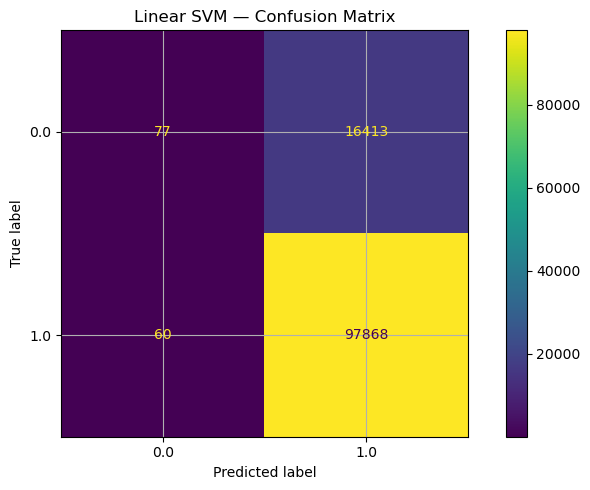

<Figure size 800x500 with 0 Axes>

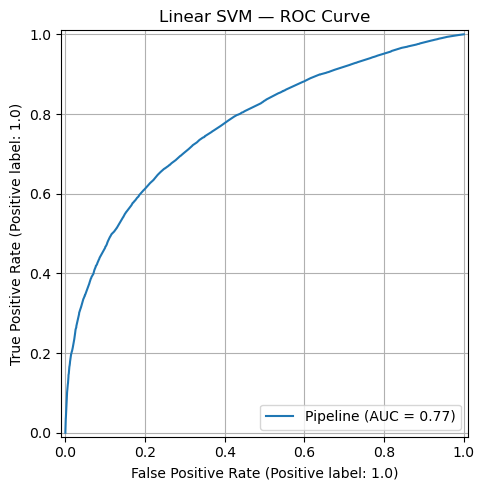

In [15]:
fig = plt.figure()
ConfusionMatrixDisplay.from_estimator(svm_linear, X_test, y_test)
plt.title('Linear SVM — Confusion Matrix')
plt.show()

fig = plt.figure()
RocCurveDisplay.from_estimator(svm_linear, X_test, y_test)
plt.title('Linear SVM — ROC Curve')
plt.show()

This step creates a summary table of the core metrics for comparison of which model performed better in classifying categories between the target variable: Diabetes.

In [16]:
models = {
    'LogReg': logreg_pipe,
    'Linear-SVM': svm_linear
}

summary = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)
    summary.append({
        'model': name,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob),
    })

summary_df = pd.DataFrame(summary).sort_values(by='roc_auc', ascending=False).reset_index(drop=True)
summary_df

,model,accuracy,precision,recall,f1,roc_auc
0,LogReg,0.855521,0.862199,0.989308,0.921391,0.773765
1,Linear-SVM,0.856028,0.856380,0.999387,0.922374,0.773407


This step creates a simple a simple Multi-Layer Perceptron (MLP) model. 

In [29]:
scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test = scaler.transform(X_test)

print("Training set shape:", Xs_train.shape)
print("Testing set shape:", Xs_test.shape)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Create a sequential model
simple_mlp = keras.Sequential([
    layers.Input(shape=(8,)),             # Input layer: 8 features
    layers.Dense(8, activation='relu'),   # Hidden layer 1: 8 neurons + ReLU
    layers.Dense(8, activation='relu'),   # Hidden layer 2: 8 neurons + ReLU
    layers.Dense(1, activation='sigmoid') # Output layer: 1 neuron + Sigmoid for binary classification
])

# Compile the model
# - Optimizer: Adam (adaptive gradient descent)
# - Loss: binary cross-entropy (for classification)
# - Metrics: accuracy (to monitor performance)
simple_mlp.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Show a summary of the network structure
simple_mlp.summary()

Training set shape: (343252, 8)
Testing set shape: (114418, 8)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 153 (612.00 B)

 Trainable params: 153 (612.00 B)

 Non-trainable params: 0 (0.00 B)

This step trains the simple MLP model that we just created above on the train data.

In [18]:
hist = simple_mlp.fit(
    Xs_train, y_train,
    epochs=40,
    batch_size=32,
    validation_split=0.2,
    verbose=0
)

print("✅ Training complete!")


✅ Training complete!


This step evaluates the simple MLP model on the test data and creates a visual to analyze the loss over epochs between the training and validation data frames. This step also creates confusion matrix, the ROC-AUC curve, and the classification report.

📊 Test Accuracy: 0.856


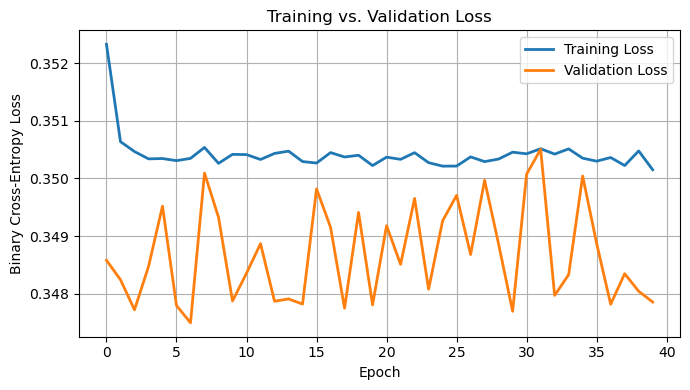

3576/3576 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


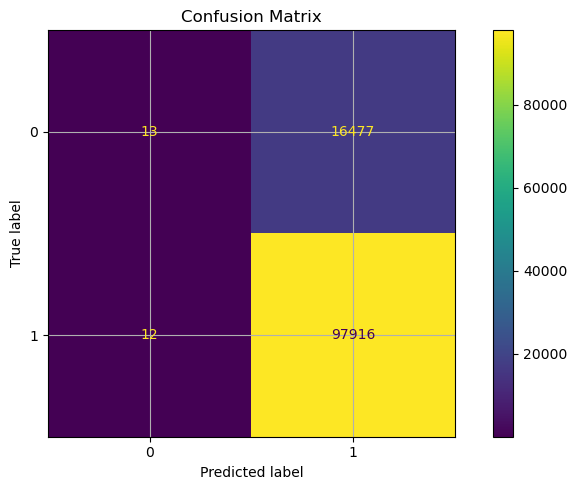

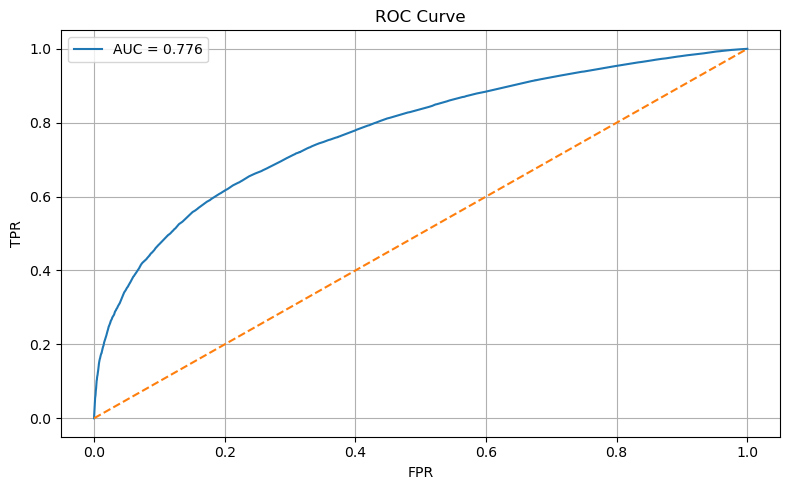

              precision    recall  f1-score   support

         0.0       0.52      0.00      0.00     16490
         1.0       0.86      1.00      0.92     97928

    accuracy                           0.86    114418
   macro avg       0.69      0.50      0.46    114418
weighted avg       0.81      0.86      0.79    114418



In [19]:
# Evaluate on the test set
test_loss, test_acc = simple_mlp.evaluate(Xs_test, y_test, verbose=0)
print(f"📊 Test Accuracy: {test_acc:.3f}")

# Plot training vs. validation loss over epochs
plt.figure(figsize=(7, 4))
plt.plot(hist.history['loss'], label='Training Loss', linewidth=2)
plt.plot(hist.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

y_proba = simple_mlp.predict(Xs_test).ravel()
y_pred  = (y_proba >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, thr = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC Curve"); plt.legend()
plt.show()

print(classification_report(y_test, y_pred))

This step splits the data three ways: training, validating, and testing sets. This time we need an actual sepearate set for the validation because of the EarlyStopping and Model checkpoints included in this Enhanced MLP model.

In [20]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train,
    test_size=0.1,
    random_state=RANDOM_STATE,
    stratify=y_train
)

scaler = StandardScaler().fit(X_train_split)

X_train_s = scaler.transform(X_train_split)
X_val_s   = scaler.transform(X_val_split)
X_test_s  = scaler.transform(X_test)

y_train = y_train_split
y_val   = y_val_split


This step builds and evaluates the enhanced MLP and gives you the metrics to analyze how well it performed on unseen data.

In [24]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks, regularizers, models

def build_mlp(input_dim, l2=1e-5, dropout=0.1):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        layers.Dropout(dropout),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2)),
        layers.Dropout(dropout),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
                  loss='binary_crossentropy',
                  metrics=['accuracy', keras.metrics.AUC(name='auc')])
    return model

enhanced_mlp = build_mlp(X_train_s.shape[1])

# 5) Callbacks
ckpt_path = "best_mlp.keras"
cbs = [
    callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss'),
    callbacks.ModelCheckpoint(ckpt_path, save_best_only=True, monitor='val_loss')
]

hist = enhanced_mlp.fit(X_train_s, y_train, validation_data=(X_val_s, y_val),
               epochs=100, batch_size=32, callbacks=cbs, verbose=0)

print("Best val loss:", min(hist.history['val_loss']))

# Evaluate
test_metrics = enhanced_mlp.evaluate(X_test_s, y_test, return_dict=True, verbose=0)
test_metrics

Best val loss: 0.34918832778930664


{'accuracy': 0.8567008972167969,
 'auc': 0.7769445776939392,
 'loss': 0.3495902121067047}

This step creates a visual to analyze the loss over epochs between the training and validation data frames. This step also creates confusion matrix, the ROC-AUC curve, and the classification report.

3576/3576 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


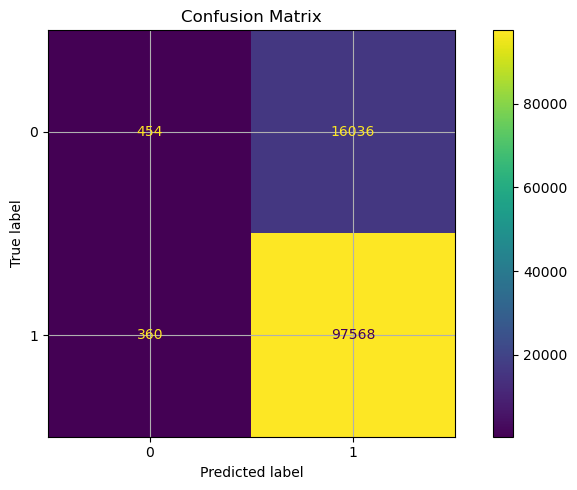

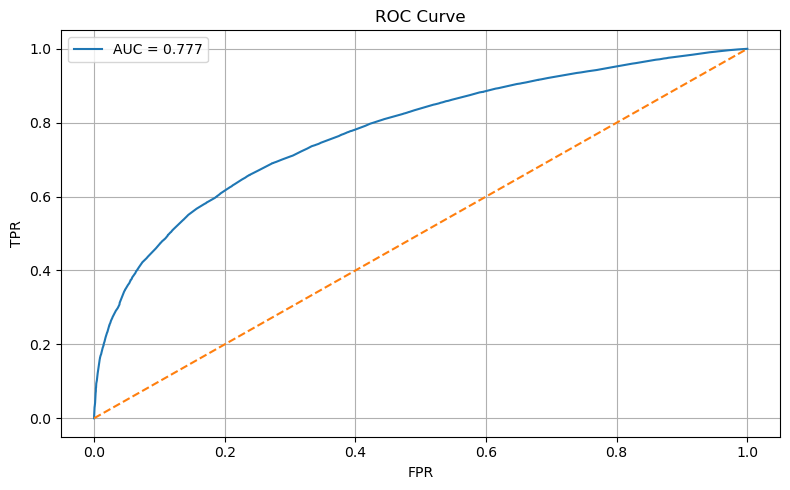

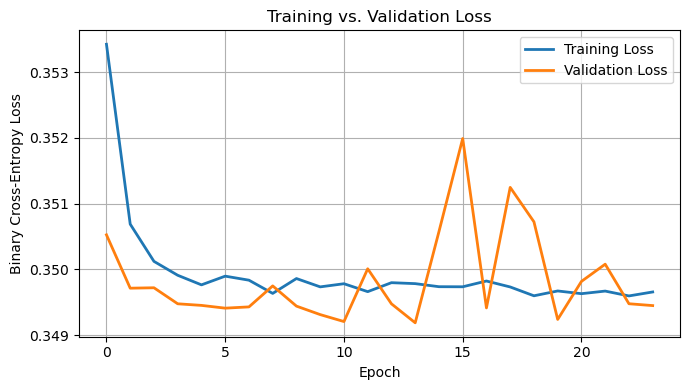

              precision    recall  f1-score   support

         0.0       0.56      0.03      0.05     16490
         1.0       0.86      1.00      0.92     97928

    accuracy                           0.86    114418
   macro avg       0.71      0.51      0.49    114418
weighted avg       0.82      0.86      0.80    114418



In [25]:
y_proba = enhanced_mlp.predict(X_test_s).ravel()
y_pred  = (y_proba >= 0.5).astype(int)


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, thr = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC Curve"); plt.legend()
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(hist.history['loss'], label='Training Loss', linewidth=2)
plt.plot(hist.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

print(classification_report(y_test, y_pred))

This step compares all 4 models employed and puts them in a table..

In [26]:
models = {
    'LogReg': logreg_pipe,
    'Linear-SVM': svm_linear,
    'Simple-MLP' : simple_mlp,
    'Enhanced-MLP' : enhanced_mlp
}

summary = []

for name, model in models.items():

    if name in ['Simple-MLP', 'Enhanced-MLP']:
        # pick the correct scaled data for each model
        X_eval = Xs_test if name == 'Simple-MLP' else X_test_s  

        y_prob = model.predict(X_eval).ravel()
        y_pred = (y_prob >= 0.5).astype(int)

    else:
        y_pred = model.predict(X_test)
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)[:, 1]
        else:
            y_prob = model.decision_function(X_test)

    summary.append({
        'model': name,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_prob)
    })

summary_df = pd.DataFrame(summary).sort_values(by='roc_auc', ascending=False)
summary_df

3576/3576 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
3576/3576 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


,model,accuracy,precision,recall,f1,roc_auc
3,Enhanced-MLP,0.856701,0.858843,0.996324,0.922489,0.777017
2,Simple-MLP,0.855888,0.855961,0.999877,0.922339,0.776362
0,LogReg,0.855521,0.862199,0.989308,0.921391,0.773765
1,Linear-SVM,0.856028,0.856380,0.999387,0.922374,0.773407
